In [2]:
import xarray as xr

import pymc as pymc
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import datetime
import arviz as az

from scipy.special import expit

from werp_projecting_sfis.file_io import sfi_file_to_pandas 

import random


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
filename = r"C:/Users/rob635/OneDrive - CSIRO/WERP/SFI_Projection/Data/_MURR_B0H000__eFA_annual_stats_10discount.txt"
outdf0 = sfi_file_to_pandas(filename)
outdf0['ewater'] = 0.0
outdf0['ewateri'] =  0
filename1 = r"C:/Users/rob635/OneDrive - CSIRO/WERP/SFI_Projection/Data/_MURR_P0H000__eFA_annual_stats_10discount.txt"
outdf1 = sfi_file_to_pandas(filename1)
outdf1['ewater'] = 2750.0
outdf1['ewateri'] = 1
outdf = pd.concat([outdf0,outdf1], axis=0)

outdf.set_index(['ewateri'], append=True, inplace=True)
#outdf = outdf1.copy(deep=True)

In [4]:
inflowfile = "C:/Users/rob635/OneDrive - CSIRO/WERP/SFI_Projection/Data/InflowData_from modelled outputs_P0H/MURR_P0H.csv"

inpredictor = pd.read_csv(inflowfile)
inpredictor['date'] = pd.to_datetime(inpredictor['date'])
inpredictor.set_index('date', inplace=True)
inpredictor
annualpredictor0 = inpredictor.resample("YE-JUN").sum()
annualpredictor0['ewater'] = 2750.0
annualpredictor0['ewateri'] = 1
inflowfile = "C:/Users/rob635/OneDrive - CSIRO/WERP/SFI_Projection/Data/InflowData_from modelled outputs_P0H/MURR_B0H.csv"

inpredictor = pd.read_csv(inflowfile)
inpredictor['date'] = pd.to_datetime(inpredictor['date'])
inpredictor.set_index('date', inplace=True)
inpredictor
annualpredictor1 = inpredictor.resample("YE-JUN").sum()
annualpredictor1['ewater'] =  0.0
annualpredictor1['ewateri'] =  0

annualpredictor = pd.concat([annualpredictor1, annualpredictor0], axis = 0)

#annualpredictor = annualpredictor0.copy(deep=True)


In [5]:
annualpredictor.set_index(['ewateri'], append=True, inplace=True)

In [6]:
outdf

,,BMF_R1,BMF_R2,BMF_R3,BMF_R4,BMF_R5,BMF_R6,BMF_R7,GKP_R1,GKP_R2,GKP_R3,...,EDW_R2,EDW_R3,EDW_R4,EDW_R5,LDF_R1,LDF_R2,LDF_R3,LDF_R4,LDF_R5,ewater
,ewateri,,,,,,,,,,,,,,,,,,,,,
1896-06-30,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1897-06-30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1898-06-30,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1899-06-30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-06-30,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-06-30,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2750.0
2006-06-30,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2750.0
2007-06-30,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2750.0


In [7]:
laggedinflow_predictor = annualpredictor.copy(deep=True)
laggedinflow_predictor.columns = [col +"_lagged" for col in laggedinflow_predictor.columns]
laggedinflow_predictor.reset_index(inplace=True)
laggedtimeindex = laggedinflow_predictor['date']
laggedtimeindexstring = [ str(laggedtime.year-1) + "-" + str(laggedtime.month) + "-" + str(laggedtime.day) for laggedtime in laggedtimeindex]
laggedinflow_predictor['date'] = pd.to_datetime(laggedtimeindexstring)
laggedinflow_predictor.set_index(['date','ewateri'], append=False, inplace=True)
laggedinflow_predictor

,,inflow_lagged,outflow_lagged,local_lagged,ewater_lagged
date,ewateri,,,,
1895-06-30,0,7881104.0,2374620.0,5.594508e+06,0.0
1896-06-30,0,5613518.0,864139.0,4.225391e+06,0.0
1897-06-30,0,7688981.0,578393.0,4.986283e+06,0.0
1898-06-30,0,8066449.0,1135672.0,6.189946e+06,0.0
1899-06-30,0,7435997.0,1742445.0,5.112734e+06,0.0
...,...,...,...,...,...
2004-06-30,1,7253731.0,1711289.0,5.462452e+06,2750.0
2005-06-30,1,8887863.0,2754732.0,6.492137e+06,2750.0
2006-06-30,1,2910648.0,723644.0,2.152755e+06,2750.0


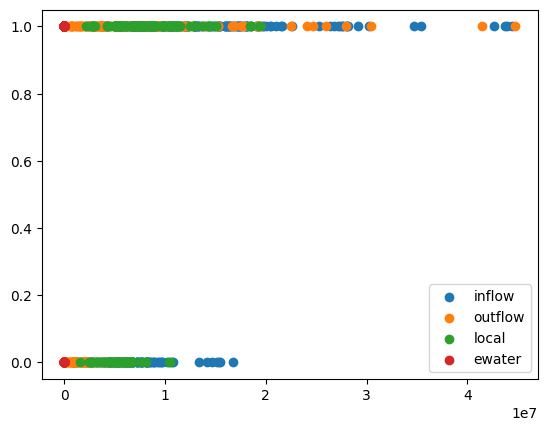

In [8]:
for col in annualpredictor.columns:
    plt.scatter(annualpredictor[col], outdf['BMF_R1'], label = col)

plt.legend()

Add.0 p


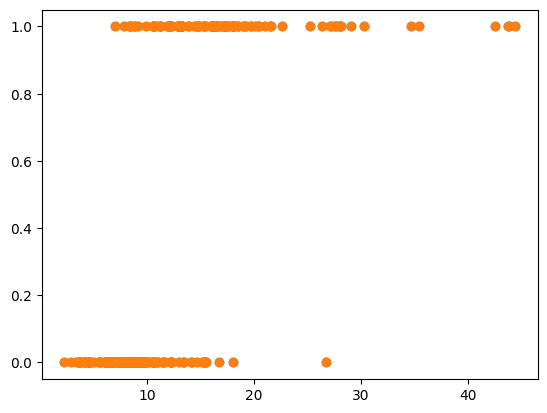

In [9]:
data = pd.concat([annualpredictor['inflow'], annualpredictor['ewater']],axis=1, join='inner')
data = pd.concat([data,outdf['BMF_R3']],axis=1)
data['inflow'] = (data['inflow']/1000000)
data['ewater'] = (data['ewater']/1000)

data = data.reset_index()[data.columns[-3:]]

plt.scatter(x=data['inflow'], y= data['BMF_R3'])

data = data.sort_values(by = 'inflow')
n = 1 #data.shape[0]

plt.scatter(data['inflow'], data['BMF_R3'], label = col)

with pymc.Model() as binomial_regression_model:
    x = pymc.Data("x", (data['inflow']))
    x1 = pymc.Data('x1', data['ewater'])
    # priors
    beta0 = pymc.Normal("beta0", mu=0, sigma=100)
    beta1 = pymc.Normal("beta1", mu=0, sigma=100)
    beta2 = pymc.Normal("beta2", mu=0, sigma=100)
    # linear model
    mu = beta0 + beta1 * x + beta2 * x1
    p = pymc.Deterministic("p", pymc.math.invlogit(mu))
    print(mu, p)
    # likelihood
    pymc.Binomial("y", n=n, p=p, observed=data['BMF_R3'])

In [10]:
with binomial_regression_model:
    idata = pymc.sample(2000, tune=4000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, beta1, beta2]


Output()

Sampling 4 chains for 4_000 tune and 2_000 draw iterations (16_000 + 8_000 draws total) took 55 seconds.


array([[<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta0'}>],
       [<Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'beta2'}>]], dtype=object)

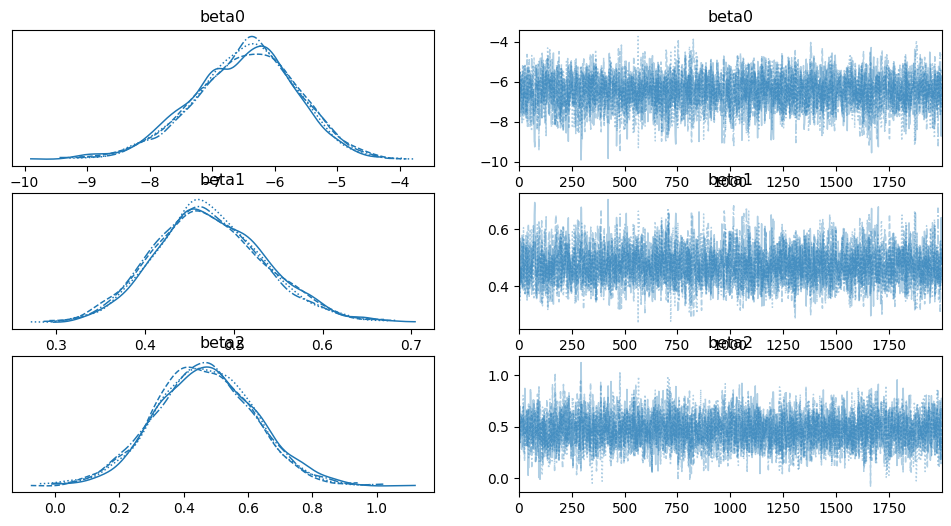

In [11]:
az.plot_trace(idata, var_names=["beta0", "beta1", "beta2"])

In [12]:
p_true = (data["BMF_R3"])

[[<matplotlib.axis.YTick at 0x204378fbe50>,

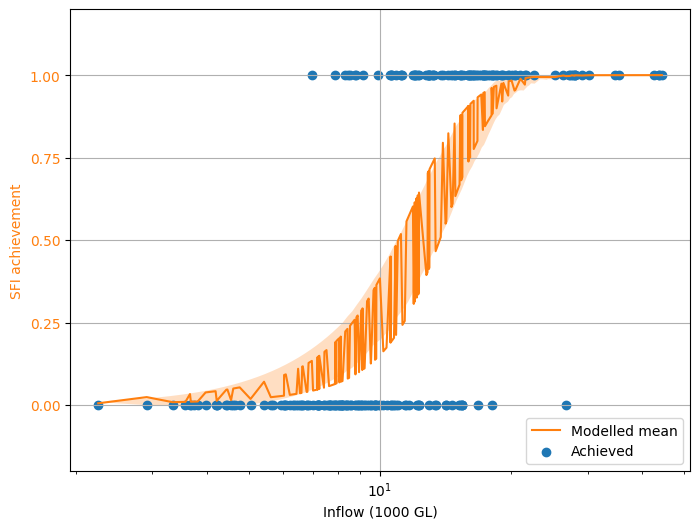

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8,6)) #, gridspec_kw={"width_ratios": [2, 1]})

# Data space plot ========================================================
az.plot_hdi(
    data["inflow"],
    idata.posterior.p,
    hdi_prob=0.95,
    fill_kwargs={"alpha": 0.25, "linewidth": 0},
    ax=ax,
    color="C1",
)
# posterior mean
post_mean = idata.posterior.p.mean(("chain", "draw"))
ax.plot(data["inflow"], post_mean, label="Modelled mean", color="C1")
# plot truth
ax.scatter(data["inflow"], p_true,  label="Achieved")
# formatting
ax.set(xlabel="Inflow (1000 GL)")
ax.set_ylabel("SFI achievement", color="C1")
ax.tick_params(axis="y", labelcolor="C1")
ax.legend(loc="lower right")
ax.set_xscale('log')
# instantiate a second axes that shares the same x-axis
#freq = ax.twinx()
# freq.set_ylabel("number of successes")
# freq.scatter(data["inflow"], data["BMF_R3"], color="k", label="data")
# get y-axes to line up
y_buffer = 0.2
#freq.set(ylim=[-y_buffer, n + y_buffer])
ax.set(ylim=[-(y_buffer / n), 1 + (y_buffer / n)])
ax.grid()
# freq.grid(None)
# # set both y-axis to have 5 ticks
ax.set(yticks=np.linspace(0, n, 5) / n)
# freq.set(yticks=np.linspace(0, n, 5))

# # Parameter space plot ===================================================
# az.plot_kde(
#     az.extract(idata, var_names="beta0"),
#     az.extract(idata, var_names="beta1"),
#     contourf_kwargs={"cmap": "Blues"},
#     ax=ax[1],
# )
# #ax[1].plot(beta0_true, beta1_true, "C2o", label="true")
# ax[1].set(xlabel=r"$\beta_0$", ylabel=r"$\beta_1$", title="Parameter space")
# ax[1].legend(facecolor="white", frameon=True);

In [14]:
predictdata1 = data.copy(deep=True)
predictdata2 = data.copy(deep = True)
predictdata1 = predictdata1[0:100]
predictdata2 = predictdata2[0:100]
predictdata1['inflow'] = np.exp(np.log(data['inflow'].min() )+np.array([float(a)/float(100.) for a in range(100)] )* (np.log(data['inflow'].max())-np.log(data['inflow'].min())))
predictdata2['inflow'] = np.exp(np.log(data['inflow'].min() )+np.array([float(a)/float(100.) for a in range(100)] )* (np.log(data['inflow'].max())-np.log(data['inflow'].min())))

In [15]:
predictdata1.drop(columns=['BMF_R3'],inplace=True)
predictdata1['ewater'] = 0.0
predictdata2['ewater'] = 2750.0/1000.0

In [16]:
with binomial_regression_model:
    pymc.set_data({'x':predictdata1['inflow'] ,'x1': predictdata1['ewater']})
    idata1 = pymc.sample_posterior_predictive(idata,  var_names="p")

    pymc.set_data({'x':predictdata2['inflow'],'x1': predictdata2['ewater']})
    idata2 = pymc.sample_posterior_predictive(idata, var_names="p")

Sampling: []


Output()

Sampling: []


Output()

In [17]:
with binomial_regression_model:
    pymc.set_data({'x':predictdata2['inflow'] })
    idata = pymc.sample_posterior_predictive(idata,  var_names=["p"],
        return_inferencedata=True,
        predictions=True,
        extend_inferencedata=True,)

Sampling: []


Output()

In [18]:
outquants1 = idata1.posterior_predictive.p.quantile(q= [0.025,0.25,0.5,0.75,0.975], dim = ("chain",'draw') )
outquants2 = idata2.posterior_predictive.p.quantile(q= [0.025,0.25,0.5,0.75,0.975], dim = ("chain",'draw') )

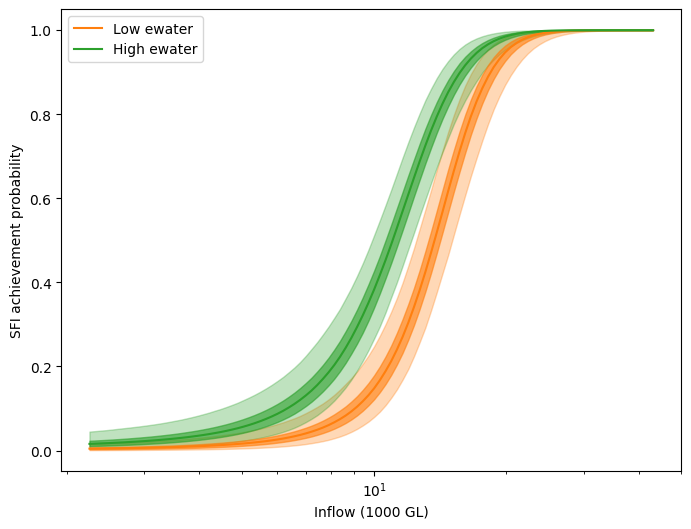

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8,6)) #, gridspec_kw={"width_ratios": [2, 1]})


ax.fill_between(x = (predictdata1['inflow']), y1 = outquants1.loc[{'quantile':0.025}].data ,y2 = outquants1.loc[{'quantile':0.975}].data, color = "C1", alpha = 0.3)
ax.fill_between(x = (predictdata2['inflow']), y1 = outquants2.loc[{'quantile':0.025}].data ,y2 = outquants2.loc[{'quantile':0.975}].data, color = "C2", alpha = 0.3)
ax.fill_between(x = (predictdata1['inflow']), y1 = outquants1.loc[{'quantile':0.25}].data ,y2 = outquants1.loc[{'quantile':0.75}].data, color = "C1", alpha = 0.6)
ax.fill_between(x = (predictdata2['inflow']), y1 = outquants2.loc[{'quantile':0.25}].data ,y2 = outquants2.loc[{'quantile':0.75}].data, color = "C2", alpha = 0.6)

# posterior mean
post_mean1 = idata1.posterior_predictive.p.mean(("chain", "draw"))
post_mean2 = idata2.posterior_predictive.p.mean(("chain", "draw"))
#ax.plot(predictdata1["inflow"], post_mean1, label="posterior mean", color="C1", linestyle = "--")
#ax.plot(predictdata2["inflow"], post_mean2, label="posterior mean", color="C2", linestyle = "--")

ax.plot(predictdata1["inflow"], outquants1.loc[{'quantile':0.5}].data, label="Low ewater", color="C1")
ax.plot(predictdata2["inflow"], outquants2.loc[{'quantile':0.5}].data, label="High ewater", color="C2")

# plot truth
#ax.scatter(data["inflow"], p_true,  label="true", color="C2")
# formatting
ax.set(xlabel="Inflow (1000 GL)")
ax.set_xscale('log')
ax.set_ylabel("SFI achievement probability", color="black")
ax.tick_params(axis="y", labelcolor="black")
ax.legend()

In [25]:
sset = np.array([int(random.random()*outdf0.shape[0]) for a in range(11)])
sset

array([96, 20, 41, 32, 71, 86, 89, 81, 26, 31, 26])

In [26]:
predictdata1 = data.loc[sset]
predictdata1['ewater']=0.0
predictdata2 = predictdata1.copy(deep=True)
predictdata2['ewater']=2750.0/1000

In [27]:

with binomial_regression_model:
    pymc.set_data({'x':predictdata1['inflow'] ,'x1':predictdata1['ewater'] })
    idata1 = pymc.sample_posterior_predictive(idata,  var_names="p")

    pymc.set_data({'x':predictdata2['inflow'],'x1':predictdata2['ewater']})
    idata2 = pymc.sample_posterior_predictive(idata, var_names="p")

outquants1 = idata1.posterior_predictive.p.quantile(q= [0.025,0.25,0.5,0.75,0.975], dim = ("chain",'draw') )
outquants2 = idata2.posterior_predictive.p.quantile(q= [0.025,0.25,0.5,0.75,0.975], dim = ("chain",'draw') )

Sampling: []


Output()

Sampling: []


Output()

Text(0.5, 0, 'Year')

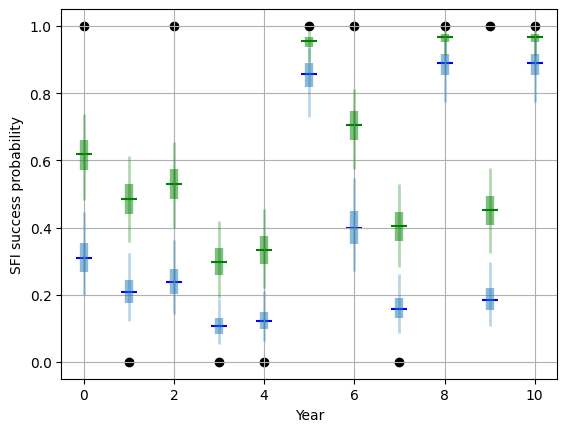

In [28]:
pltx = [a for a in range(predictdata1.shape[0])]
plt.scatter(x=pltx, y = predictdata1['BMF_R3'].values , c='black')
plt.vlines(x=pltx, ymin = outquants1.loc[{'quantile':0.025}].data ,ymax = outquants1.loc[{'quantile':0.975}].data , linewidths = 2, alpha = 0.3)
plt.vlines(x=pltx, ymin = outquants1.loc[{'quantile':0.25}].data ,ymax = outquants1.loc[{'quantile':0.75}].data , linewidths = 6, alpha = 0.5)
plt.scatter(x=pltx, y = outquants1.loc[{'quantile':0.5}].data,marker=0, c = 'blue')
plt.scatter(x=pltx, y = outquants1.loc[{'quantile':0.5}].data,marker=1, c = 'blue')

plt.vlines(x=pltx, ymin = outquants2.loc[{'quantile':0.025}].data ,ymax = outquants2.loc[{'quantile':0.975}].data, color='green' , linewidths = 2, alpha = 0.3)
plt.vlines(x=pltx, ymin = outquants2.loc[{'quantile':0.25}].data ,ymax = outquants2.loc[{'quantile':0.75}].data, color='green' , linewidths = 6, alpha = 0.5)
plt.scatter(x=pltx, y = outquants2.loc[{'quantile':0.5}].data,marker=0, c = 'green')
plt.scatter(x=pltx, y = outquants2.loc[{'quantile':0.5}].data,marker=1, c = 'green')

plt.grid()
plt.ylabel("SFI success probability")
plt.xlabel("Year")



In [29]:
out1summary = idata1.posterior_predictive.p.sum(dim = ("p_dim_2")).quantile(q= [0.025,0.25,0.5,0.75,0.975], dim = ("chain",'draw') )
out1summary = (out1summary/predictdata1.shape[0])
outres1 = predictdata1['BMF_R3'].sum()/predictdata1.shape[0]
print(out1summary, outres1)

out2summary = idata2.posterior_predictive.p.sum(dim = ("p_dim_2")).quantile(q= [0.025,0.25,0.5,0.75,0.975], dim = ("chain",'draw') )
out2summary = (out2summary/predictdata2.shape[0])
outres2 = predictdata2['BMF_R3'].sum()/predictdata2.shape[0]
print(out1summary, outres1)

<xarray.DataArray 'p' (quantile: 5)> Size: 40B
array([0.31646317, 0.36704425, 0.39530038, 0.42556683, 0.4879703 ])
Coordinates:
  * quantile  (quantile) float64 40B 0.025 0.25 0.5 0.75 0.975 0.6363636363636364
<xarray.DataArray 'p' (quantile: 5)> Size: 40B
array([0.31646317, 0.36704425, 0.39530038, 0.42556683, 0.4879703 ])
Coordinates:
  * quantile  (quantile) float64 40B 0.025 0.25 0.5 0.75 0.975 0.6363636363636364


(0.0, 1.0)

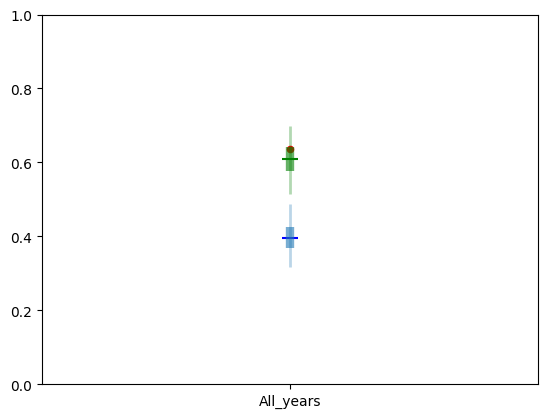

In [30]:
plt.vlines(x = "All_years", ymin=out1summary.loc[{'quantile':0.025}].data ,ymax = out1summary.loc[{'quantile':0.975}].data , linewidths = 2, alpha = 0.3)
plt.vlines(x = "All_years", ymin=out1summary.loc[{'quantile':0.25}].data ,ymax = out1summary.loc[{'quantile':0.75}].data , linewidths = 6, alpha = 0.6)
plt.scatter(x="All_years", y = out1summary.loc[{'quantile':0.5}].data,marker=0, c = 'blue')
plt.scatter(x="All_years", y = out1summary.loc[{'quantile':0.5}].data,marker=1, c = 'blue')

plt.vlines(x = "All_years", ymin=out2summary.loc[{'quantile':0.025}].data ,ymax = out2summary.loc[{'quantile':0.975}].data ,color = 'green', linewidths = 2, alpha = 0.3)
plt.vlines(x = "All_years", ymin=out2summary.loc[{'quantile':0.25}].data ,ymax = out2summary.loc[{'quantile':0.75}].data ,color = 'green', linewidths = 6, alpha = 0.6)
plt.scatter(x="All_years", y = out2summary.loc[{'quantile':0.5}].data,marker=0, c = 'green')
plt.scatter(x="All_years", y = out2summary.loc[{'quantile':0.5}].data,marker=1, c = 'green')
plt.scatter(x="All_years", y = outres1, c = 'red', s = 20)
plt.ylim((0,1))


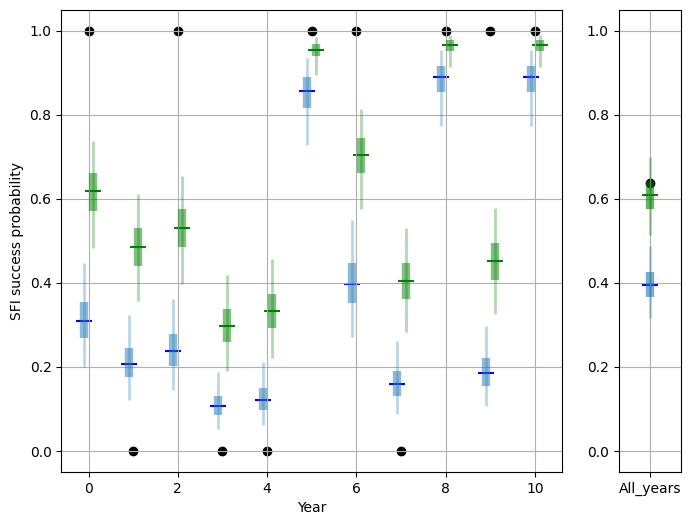

In [31]:
fig, ax = plt.subplots(1,2, figsize=(8,6), width_ratios=[8,1])

pltx = np.array([a for a in range(predictdata1.shape[0])])
ax[0].scatter(x=pltx, y = predictdata1['BMF_R3'].values , c='black')
ax[0].vlines(x=pltx-0.1, ymin = outquants1.loc[{'quantile':0.025}].data ,ymax = outquants1.loc[{'quantile':0.975}].data , linewidths = 2, alpha = 0.3)
ax[0].vlines(x=pltx-0.1, ymin = outquants1.loc[{'quantile':0.25}].data ,ymax = outquants1.loc[{'quantile':0.75}].data , linewidths = 6, alpha = 0.5)
ax[0].scatter(x=pltx-0.1, y = outquants1.loc[{'quantile':0.5}].data,marker=0, c = 'blue')
ax[0].scatter(x=pltx-0.1, y = outquants1.loc[{'quantile':0.5}].data,marker=1, c = 'blue')

ax[0].vlines(x=pltx+0.1, ymin = outquants2.loc[{'quantile':0.025}].data ,ymax = outquants2.loc[{'quantile':0.975}].data, color='green' , linewidths = 2, alpha = 0.3)
ax[0].vlines(x=pltx+0.1, ymin = outquants2.loc[{'quantile':0.25}].data ,ymax = outquants2.loc[{'quantile':0.75}].data, color='green' , linewidths = 6, alpha = 0.5)
ax[0].scatter(x=pltx+0.1, y = outquants2.loc[{'quantile':0.5}].data,marker=0, c = 'green')
ax[0].scatter(x=pltx+0.1, y = outquants2.loc[{'quantile':0.5}].data,marker=1, c = 'green')

ax[0].grid()
ax[0].set_ylabel("SFI success probability")
ax[0].set_xlabel("Year")
ax[0].set_ylim((-0.05,1.05))

ax[1].scatter(x="All_years", y = outres1, c = 'black')
ax[1].vlines(x = "All_years", ymin=out1summary.loc[{'quantile':0.025}].data ,ymax = out1summary.loc[{'quantile':0.975}].data , linewidths = 2, alpha = 0.3)
ax[1].vlines(x = "All_years", ymin=out1summary.loc[{'quantile':0.25}].data ,ymax = out1summary.loc[{'quantile':0.75}].data , linewidths = 6, alpha = 0.6)
ax[1].scatter(x="All_years", y = out1summary.loc[{'quantile':0.5}].data,marker=0, c = 'blue')
ax[1].scatter(x="All_years", y = out1summary.loc[{'quantile':0.5}].data,marker=1, c = 'blue')

ax[1].vlines(x = "All_years", ymin=out2summary.loc[{'quantile':0.025}].data ,ymax = out2summary.loc[{'quantile':0.975}].data ,color = 'green', linewidths = 2, alpha = 0.3)
ax[1].vlines(x = "All_years", ymin=out2summary.loc[{'quantile':0.25}].data ,ymax = out2summary.loc[{'quantile':0.75}].data ,color = 'green', linewidths = 6, alpha = 0.6)
ax[1].scatter(x="All_years", y = out2summary.loc[{'quantile':0.5}].data,marker=0, c = 'green')
ax[1].scatter(x="All_years", y = out2summary.loc[{'quantile':0.5}].data,marker=1, c = 'green')

ax[1].set_ylim((-0.05,1.05))
ax[1].grid()

In [25]:
np.array(idata1.posterior_predictive.p.sum(dim = ("p_dim_2")).data/predictdata1.shape[0]).flatten()

array([0.60187571, 0.54117523, 0.57720069, ..., 0.5995581 , 0.5995581 ,
       0.5995581 ])

(0.0, 1.0)

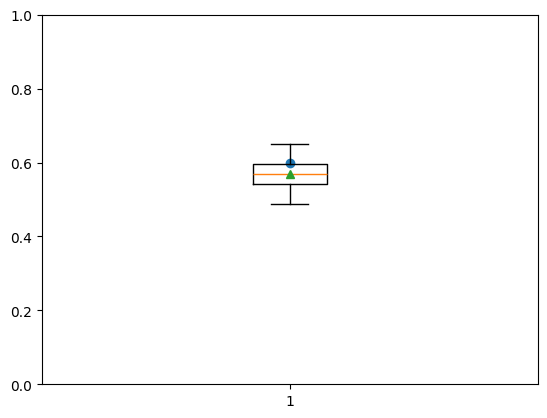

In [26]:
plt.boxplot( (idata1.posterior_predictive.p.sum(dim = ("p_dim_2") ).data/predictdata1.shape[0]).flatten() , whis = 0.95, showfliers= False, showmeans=True)
plt.scatter(x=1, y = outres1)
plt.ylim((0,1))

,inflow_lagged,outflow_lagged,local_lagged,ewater_lagged
1895-06-30,7881104.0,2374620.0,5.594508e+06,0.0
1896-06-30,5613518.0,864139.0,4.225391e+06,0.0
1897-06-30,7688981.0,578393.0,4.986283e+06,0.0
1898-06-30,8066449.0,1135672.0,6.189946e+06,0.0
1899-06-30,7435997.0,1742445.0,5.112734e+06,0.0
...,...,...,...,...
2004-06-30,7253731.0,1711289.0,5.462452e+06,2750.0
2005-06-30,8887863.0,2754732.0,6.492137e+06,2750.0
2006-06-30,2910648.0,723644.0,2.152755e+06,2750.0
2007-06-30,4761189.0,396686.0,2.827960e+06,2750.0


In [146]:
data

,inflow,ewater,BMF_R3
1896-06-30,7881104.0,0.0,1.0
1897-06-30,5613518.0,0.0,0.0
1898-06-30,7688981.0,0.0,0.0
1899-06-30,8066449.0,0.0,0.0
1900-06-30,7435997.0,0.0,0.0
...,...,...,...
2005-06-30,7253731.0,2750.0,0.0
2006-06-30,8887863.0,2750.0,0.0
2007-06-30,2910648.0,2750.0,0.0
2008-06-30,4761189.0,2750.0,0.0


In [153]:
laggedinflow_predictor.head()

,inflow_lagged,outflow_lagged,local_lagged,ewater_lagged
1895-06-30,7881104.0,2374620.0,5.594508e+06,0.0
1896-06-30,5613518.0,864139.0,4.225391e+06,0.0
1897-06-30,7688981.0,578393.0,4.986283e+06,0.0
1898-06-30,8066449.0,1135672.0,6.189946e+06,0.0
1899-06-30,7435997.0,1742445.0,5.112734e+06,0.0


In [155]:
data['laggedinflow']

KeyError: 'laggedinflow'

In [32]:
data = pd.concat([annualpredictor['inflow'],annualpredictor['ewater'],laggedinflow_predictor['inflow_lagged'],outdf['BMF_R3']],axis=1)

data

,,inflow,ewater,inflow_lagged,BMF_R3
,ewateri,,,,
1896-06-30,0,7881104.0,0.0,5613518.0,1.0
1897-06-30,0,5613518.0,0.0,7688981.0,0.0
1898-06-30,0,7688981.0,0.0,8066449.0,0.0
1899-06-30,0,8066449.0,0.0,7435997.0,0.0
1900-06-30,0,7435997.0,0.0,10352803.0,0.0
...,...,...,...,...,...
2007-06-30,1,2910648.0,2750.0,4761189.0,0.0
2008-06-30,1,4761189.0,2750.0,3659820.0,0.0
2009-06-30,1,3659820.0,2750.0,NaN,0.0


,inflow,ewater,inflow_lagged,BMF_R3
111,2.251601,0.00,4.214244,0.0
225,2.910648,2.75,4.761189,0.0
113,3.338731,0.00,NaN,0.0
49,3.572318,0.00,7.705106,0.0
227,3.659820,2.75,NaN,0.0
...,...,...,...,...
175,43.749451,2.75,8.390918,1.0
60,43.892791,0.00,42.602896,1.0
174,44.449473,2.75,43.749451,1.0
228,NaN,NaN,7.881104,NaN


       inflow  ewater  inflow_lagged  BMF_R3
0    7.881104    0.00       5.613518     1.0
1    5.613518    0.00       7.688981     0.0
2    7.688981    0.00       8.066449     0.0
3    8.066449    0.00       7.435997     0.0
4    7.435997    0.00      10.352803     0.0
..        ...     ...            ...     ...
221  9.055549    2.75       7.253731     0.0
222  7.253731    2.75       8.887863     0.0
223  8.887863    2.75       2.910648     0.0
224  2.910648    2.75       4.761189     0.0
225  4.761189    2.75       3.659820     0.0

[226 rows x 4 columns]
Add.0 p


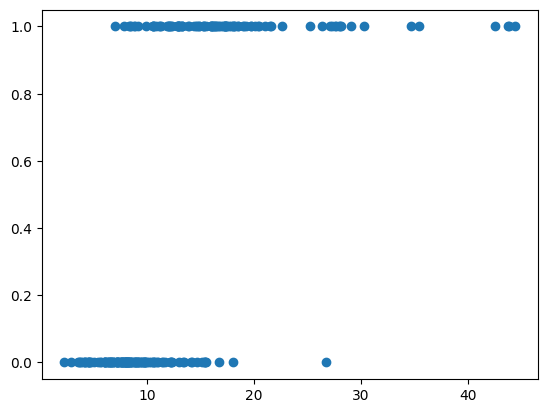

In [52]:

data = pd.concat([annualpredictor['inflow'],annualpredictor['ewater'],laggedinflow_predictor['inflow_lagged'],outdf['BMF_R3']],axis=1)

data.dropna(inplace=True)
data['inflow'] = (data['inflow']/1000000)
data['inflow_lagged'] = (data['inflow_lagged']/1000000)
data['ewater'] = data['ewater'] /1000
data = data.reset_index()[data.columns[-4:]]
print(data)
#plt.scatter(x=data['inflow'], y= data['BMF_R3'])

data = data.sort_values(by = 'inflow')
n = 1 #data.shape



plt.scatter(data['inflow'], data['BMF_R3'], label = col)

with pymc.Model() as binomial_regression_model:
    x = pymc.Data("x", (data['inflow']))
    x1 = pymc.Data("x1", (data['ewater']))
    z = pymc.Data("z", (data['inflow_lagged']))
    # priors
    beta0 = pymc.Normal("beta0", mu=0, sigma=100)
    beta1 = pymc.Normal("beta1", mu=0, sigma=100)
    beta2 = pymc.Normal("beta2", mu=0, sigma=100)
    beta3 = pymc.Normal("beta3", mu=0, sigma=100)
    # linear model
    mu = beta0 + beta1 * x + beta2 * z + beta3 * x1
    p = pymc.Deterministic("p", pymc.math.invlogit(mu))
    print(mu, p)
    # likelihood
    pymc.Binomial("y", n=n, p=p, observed=data['BMF_R3'])

In [53]:
with binomial_regression_model:
    idata = pymc.sample(2000, tune=4000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, beta1, beta2, beta3]


Output()

Sampling 4 chains for 4_000 tune and 2_000 draw iterations (16_000 + 8_000 draws total) took 57 seconds.


array([[<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta0'}>],
       [<Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'beta2'}>,
        <Axes: title={'center': 'beta2'}>],
       [<Axes: title={'center': 'beta3'}>,
        <Axes: title={'center': 'beta3'}>]], dtype=object)

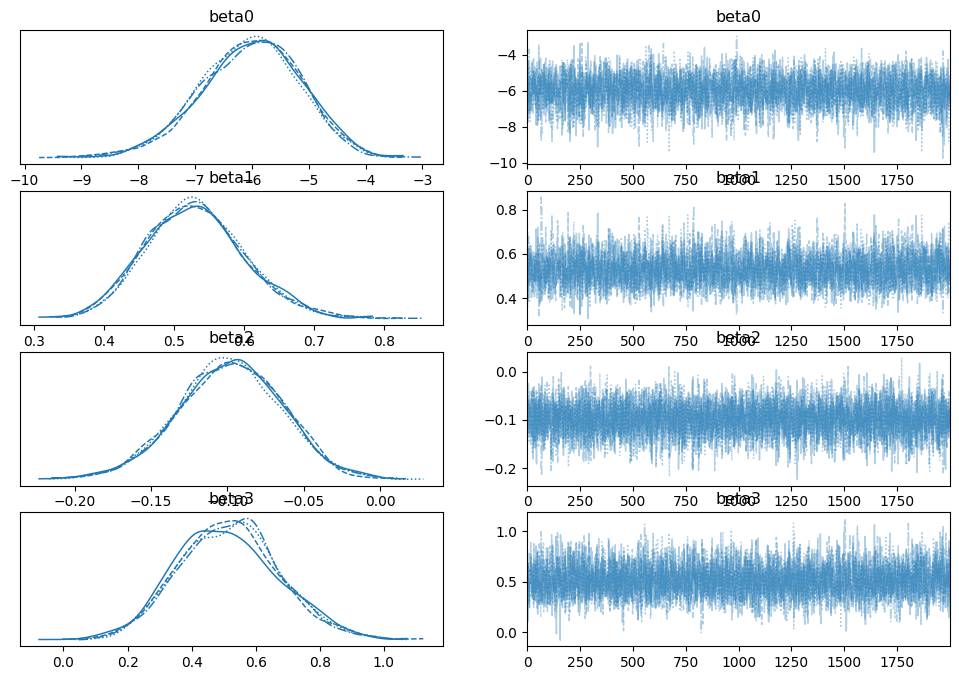

In [54]:
az.plot_trace(idata, var_names=["beta0", "beta1", "beta2",'beta3'])

[[<matplotlib.axis.YTick at 0x1a044566c80>,

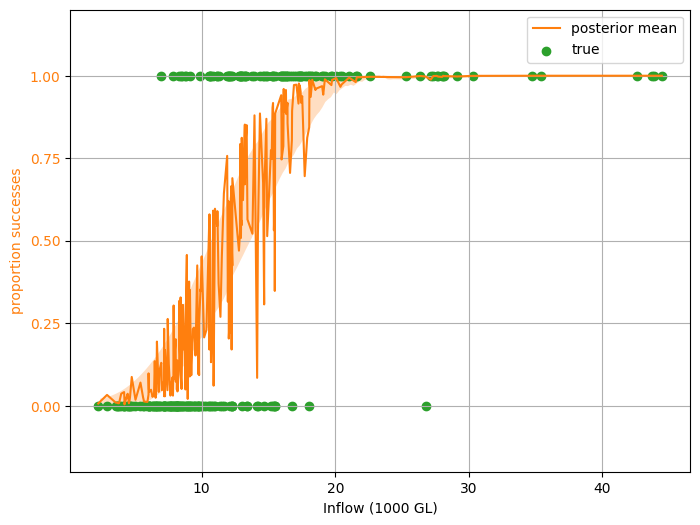

In [55]:
p_true = (data["BMF_R3"])
fig, ax = plt.subplots(1, 1, figsize=(8,6))

# Data space plot ========================================================
az.plot_hdi(
    data["inflow"],
    idata.posterior.p,
    hdi_prob=0.95,
    fill_kwargs={"alpha": 0.25, "linewidth": 0},
    ax=ax,
    color="C1",
)
# posterior mean
post_mean = idata.posterior.p.mean(("chain", "draw"))
ax.plot(data["inflow"], post_mean, label="posterior mean", color="C1")
# plot truth
ax.scatter(data["inflow"], p_true,  label="true", color="C2")
# formatting
ax.set(xlabel="Inflow (1000 GL)")
ax.set_ylabel("proportion successes", color="C1")
ax.tick_params(axis="y", labelcolor="C1")
ax.legend()
#ax.set_xscale('log')
# instantiate a second axes that shares the same x-axis
# freq = ax.twinx()
# freq.set_ylabel("number of successes")
# freq.scatter(data["inflow"], data["BMF_R3"], color="k", label="data")
# get y-axes to line up
y_buffer = 0.2
# freq.set(ylim=[-y_buffer, n + y_buffer])
ax.set(ylim=[-(y_buffer / n), 1 + (y_buffer / n)])
ax.grid()
# set both y-axis to have 5 ticks
ax.set(yticks=np.linspace(0, n, 5) / n)
#freq.set(yticks=np.linspace(0, n, 5))


In [56]:
outquants = idata.posterior.p.quantile(q= [0.05,0.25,0.5,0.75,0.95], dim = ("chain",'draw') )

In [35]:
data['inflow_lagged'].quantile([0.01]).values[0]

3.69765216

In [63]:
predictdata1 = data.copy(deep=True)
predictdata2 = data.copy(deep = True)
predictdata1['inflow_lagged'] = data['inflow_lagged'].quantile([0.01]).values[0]
predictdata2['inflow_lagged'] = data['inflow_lagged'].quantile([0.99]).values[0]
predictdata1['ewater'] = 0.0
predictdata2['ewater'] = 2750./1000
predictdata1['inflow'] = np.exp(np.log(data['inflow'].min() )+np.array([float(a)/float(data.shape[0]) for a in range(data.shape[0])] )* (np.log(data['inflow'].max())-np.log(data['inflow'].min())))

predictdata2['inflow'] = np.exp(np.log(data['inflow'].min() )+np.array([float(a)/float(data.shape[0]) for a in range(data.shape[0])] )* (np.log(data['inflow'].max())-np.log(data['inflow'].min())))

predictdata3 = data.copy(deep=True)
predictdata4 = data.copy(deep = True)
predictdata3['inflow_lagged'] = data['inflow_lagged'].quantile([0.01]).values[0]
predictdata4['inflow_lagged'] = data['inflow_lagged'].quantile([0.99]).values[0]
predictdata3['ewater'] = 2750./1000
predictdata4['ewater'] = 0.0 
predictdata3['inflow'] = np.exp(np.log(data['inflow'].min() )+np.array([float(a)/float(data.shape[0]) for a in range(data.shape[0])] )* (np.log(data['inflow'].max())-np.log(data['inflow'].min())))

predictdata4['inflow'] = np.exp(np.log(data['inflow'].min() )+np.array([float(a)/float(data.shape[0]) for a in range(data.shape[0])] )* (np.log(data['inflow'].max())-np.log(data['inflow'].min())))


In [64]:
with binomial_regression_model:
    pymc.set_data({'x':predictdata1['inflow'], 'z':predictdata1['inflow_lagged'], 'x1':predictdata1['ewater']})
    idata1 = pymc.sample_posterior_predictive(idata,  var_names="p")

    pymc.set_data({'x':predictdata2['inflow'], 'z':predictdata2['inflow_lagged'], 'x1':predictdata2['ewater']})
    idata2 = pymc.sample_posterior_predictive(idata, var_names="p")

    pymc.set_data({'x':predictdata3['inflow'], 'z':predictdata3['inflow_lagged'], 'x1':predictdata3['ewater']})
    idata3 = pymc.sample_posterior_predictive(idata,  var_names="p")

    pymc.set_data({'x':predictdata4['inflow'], 'z':predictdata4['inflow_lagged'], 'x1':predictdata4['ewater']})
    idata4 = pymc.sample_posterior_predictive(idata, var_names="p")
    

Sampling: []


Output()

Sampling: []


Output()

Sampling: []


Output()

Sampling: []


Output()

In [65]:
outquants1 = idata1.posterior_predictive.p.quantile(q= [0.05,0.25,0.5,0.75,0.95], dim = ("chain",'draw') )
outquants2 = idata2.posterior_predictive.p.quantile(q= [0.05,0.25,0.5,0.75,0.95], dim = ("chain",'draw') )
outquants3= idata3.posterior_predictive.p.quantile(q= [0.05,0.25,0.5,0.75,0.95], dim = ("chain",'draw') )
outquants4 = idata4.posterior_predictive.p.quantile(q= [0.05,0.25,0.5,0.75,0.95], dim = ("chain",'draw') )


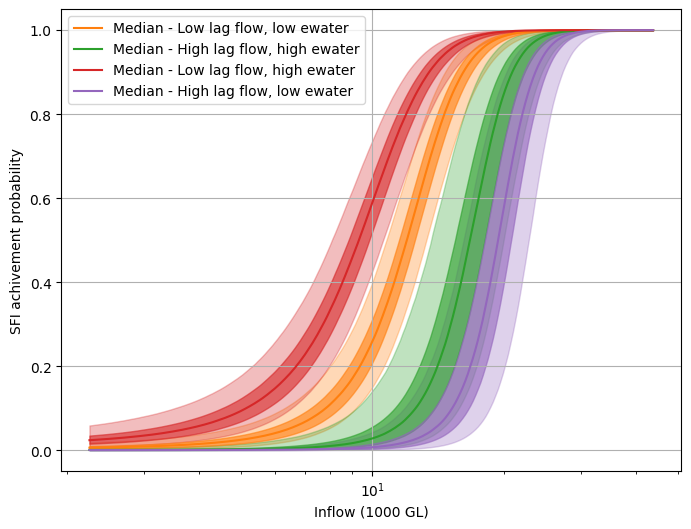

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(8,6)) #, gridspec_kw={"width_ratios": [2, 1]})

ax.fill_between(x = (predictdata1['inflow']), y1 = outquants1.loc[{'quantile':0.05}].data ,y2 = outquants1.loc[{'quantile':0.95}].data, color = "C1", alpha = 0.3)
ax.fill_between(x = (predictdata2['inflow']), y1 = outquants2.loc[{'quantile':0.05}].data ,y2 = outquants2.loc[{'quantile':0.95}].data, color = "C2", alpha = 0.3)
ax.fill_between(x = (predictdata3['inflow']), y1 = outquants3.loc[{'quantile':0.05}].data ,y2 = outquants3.loc[{'quantile':0.95}].data, color = "C3", alpha = 0.3)
ax.fill_between(x = (predictdata4['inflow']), y1 = outquants4.loc[{'quantile':0.05}].data ,y2 = outquants4.loc[{'quantile':0.95}].data, color = "C4", alpha = 0.3)

ax.fill_between(x = (predictdata1['inflow']), y1 = outquants1.loc[{'quantile':0.25}].data ,y2 = outquants1.loc[{'quantile':0.75}].data, color = "C1", alpha = 0.6)
ax.fill_between(x = (predictdata2['inflow']), y1 = outquants2.loc[{'quantile':0.25}].data ,y2 = outquants2.loc[{'quantile':0.75}].data, color = "C2", alpha = 0.6)
ax.fill_between(x = (predictdata3['inflow']), y1 = outquants3.loc[{'quantile':0.25}].data ,y2 = outquants3.loc[{'quantile':0.75}].data, color = "C3", alpha = 0.6)
ax.fill_between(x = (predictdata4['inflow']), y1 = outquants4.loc[{'quantile':0.25}].data ,y2 = outquants4.loc[{'quantile':0.75}].data, color = "C4", alpha = 0.6)


# posterior mean
post_mean1 = idata1.posterior_predictive.p.mean(("chain", "draw"))
post_mean2 = idata2.posterior_predictive.p.mean(("chain", "draw"))
#ax.plot(predictdata1["inflow"], post_mean1, label="Mean - Low lag flow", color="C1", linestyle = "--")
#ax.plot(predictdata2["inflow"], post_mean2, label="Mean - High lag flow", color="C2", linestyle = "--")

ax.plot(predictdata1["inflow"], outquants1.loc[{'quantile':0.5}].data, label="Median - Low lag flow, low ewater", color="C1")
ax.plot(predictdata2["inflow"], outquants2.loc[{'quantile':0.5}].data, label="Median - High lag flow, high ewater", color="C2")
ax.plot(predictdata3["inflow"], outquants3.loc[{'quantile':0.5}].data, label="Median - Low lag flow, high ewater", color="C3")
ax.plot(predictdata4["inflow"], outquants4.loc[{'quantile':0.5}].data, label="Median - High lag flow, low ewater", color="C4")

# plot truth
#ax.scatter(data["inflow"], p_true,  label="true", color="C2")
# formatting
ax.set(xlabel="Inflow (1000 GL)")
ax.grid()
ax.set_ylabel("SFI achivement probability", color="black")
ax.tick_params(axis="y", labelcolor="black")
ax.legend()
ax.set_xscale('log')


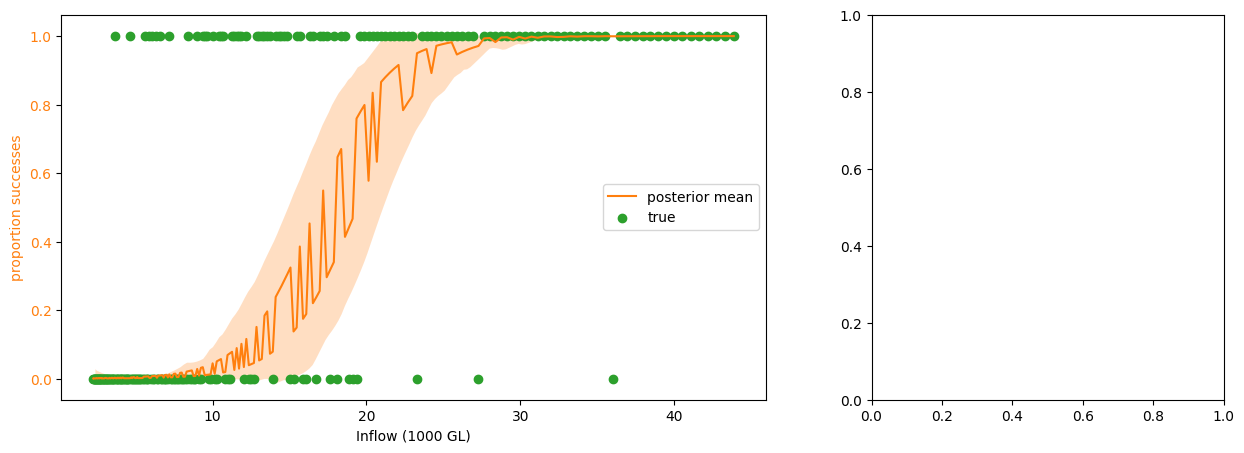

In [61]:
p_true = (data["BMF_R3"])
fig, ax = plt.subplots(1, 2, figsize=(15,5), gridspec_kw={"width_ratios": [2, 1]})

# Data space plot ========================================================
az.plot_hdi(
    predictdata2["inflow"],
    idata2.posterior_predictive.p,
    hdi_prob=0.95,
    fill_kwargs={"alpha": 0.25, "linewidth": 0},
    ax=ax[0],
    color="C1",
)
# posterior mean
post_mean = idata2.posterior_predictive.p.mean(("chain", "draw"))
ax[0].plot(predictdata2["inflow"], post_mean, label="posterior mean", color="C1")
# plot truth
ax[0].scatter(predictdata2["inflow"], p_true,  label="true", color="C2")
# formatting
ax[0].set(xlabel="Inflow (1000 GL)")
ax[0].set_ylabel("proportion successes", color="C1")
ax[0].tick_params(axis="y", labelcolor="C1")
ax[0].legend()
